In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat
import matplotlib.pyplot as plt
import time

In [2]:
# Source
# https://www.kaggle.com/puneetbhaya/online-retail

# Data preparation

In [3]:
dataset = pd.read_csv('./online_retail/Online Retail.csv', usecols=['InvoiceNo','Description'])
dataset

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS
541905,581587,CHILDREN'S APRON DOLLY GIRL
541906,581587,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [4]:
dataset = dataset.groupby(['InvoiceNo'])['Description'].apply(list)

In [5]:
transactions=[]
for item in dataset.values:
    transactions.append(list(set(item)))

In [28]:
transactions[0:4]

[['RED WOOLLY HOTTIE WHITE HEART.',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'CREAM CUPID HEARTS COAT HANGER',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'SET 7 BABUSHKA NESTING BOXES'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'DOORMAT NEW ENGLAND',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  "POPPY'S PLAYHOUSE BEDROOM ",
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'HOME BUILDING BLOCK WORD',
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART',
  'LOVE BUILDING BLOCK WORD',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'IVORY KNITTED MUG COSY '],
 ['RED COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'YELLOW COAT RACK PARIS FASHION']]

In [7]:
len(transactions)

25900

## Done

In [8]:
pd.set_option("max_colwidth", 150)

In [9]:
support=1.0
confidence=70 # don't need here
target='all'
zmin=2

# Apriori

In [10]:
start=time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.09707045100003597


In [11]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_apriori

,0,1
0,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",833
1,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",784
2,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",733
3,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)",683
4,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT)",648
...,...,...
442,"(ROSES REGENCY TEACUP AND SAUCER , WHITE HANGING HEART T-LIGHT HOLDER)",259
443,"(BAKING SET 9 PIECE RETROSPOT , RETROSPOT TEA SET CERAMIC 11 PC )",259
444,"(JUMBO BAG VINTAGE LEAF, JUMBO SHOPPER VINTAGE RED PAISLEY)",259
445,"(JUMBO STORAGE BAG SKULLS, JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",259


# FP-Growth

In [12]:
start=time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.1261195269999007


In [13]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1
0,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",833
1,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",784
2,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",733
3,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)",683
4,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT)",648
...,...,...
442,"(CHARLOTTE BAG APPLES DESIGN, STRAWBERRY CHARLOTTE BAG)",259
443,"(BAKING SET 9 PIECE RETROSPOT , RETROSPOT TEA SET CERAMIC 11 PC )",259
444,"(JUMBO BAG VINTAGE LEAF, JUMBO SHOPPER VINTAGE RED PAISLEY)",259
445,"(JUMBO STORAGE BAG SKULLS, JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",259


# ECLAT

In [14]:
start=time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.09102989399980288


In [15]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1
0,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",833
1,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",784
2,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",733
3,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)",683
4,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROSPOT)",648
...,...,...
442,"(JUMBO STORAGE BAG SKULLS, JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",259
443,"(ROSES REGENCY TEACUP AND SAUCER , WHITE HANGING HEART T-LIGHT HOLDER)",259
444,"(CHARLOTTE BAG APPLES DESIGN, STRAWBERRY CHARLOTTE BAG)",259
445,"(JUMBO BAG VINTAGE LEAF, JUMBO SHOPPER VINTAGE RED PAISLEY)",259


## Frequent item sets

In [16]:
df_fi_eclat.values.tolist()

[[('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 833],
 [('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  784],
 [('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 733],
 [('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 683],
 [('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'), 648],
 [('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '), 646],
 [('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'), 644],
 [('PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '), 614],
 [('LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT'), 613],
 [('JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO BAG RED RETROSPOT'), 593],
 [('LUNCH BAG RED RETROSPOT', 'JUMBO BAG RED RETROSPOT'), 588],
 [('LUNCH BAG SUKI DESIGN ', 'LUNCH BAG RED RETROSPOT'), 564],
 [('LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG RED RETROSPOT'), 563],
 [('LUNCH BAG CARS BLUE', 'LUNCH BAG RED RETROSPOT'), 561],
 [('PAPER CHAIN KIT VINTAGE CHRISTM

In [17]:
df_fi_eclat.values.tolist()[0]

[('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 833]

In [18]:
df_fi_eclat.values.tolist()[-1]

[('BAKING SET 9 PIECE RETROSPOT ', 'RETROSPOT TEA SET CERAMIC 11 PC '), 259]

# Фиксированный набор данных, изменяемый порог поддержки

In [19]:
supps = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5, 2.0, 2.5, 3.0, 3.2]

a = []
fp = []
e = []

fi_fpgrowth=[]

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [20]:
for supp in supps:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_fp = time.perf_counter()
    
    ####
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))
    fi_it_set_max_len.append(max(size))
    
    size=[]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))     
    num_of_unique_fr_it_set.append(len(set(size)))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Сравнение быстродействия алгоритмов 

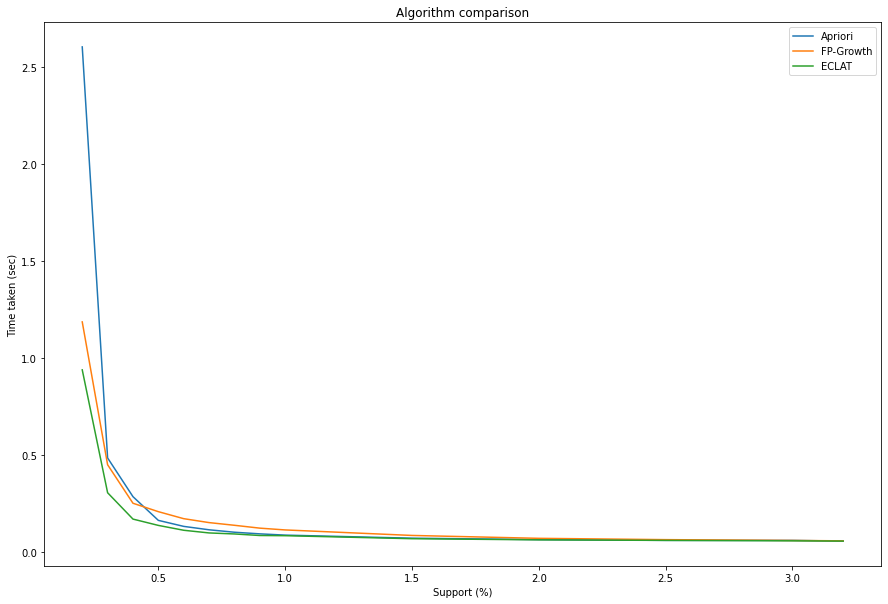

In [21]:
plt.plot(supps, a, label = "Apriori")
plt.plot(supps, fp, label = "FP-Growth")
plt.plot(supps, e, label = "ECLAT")

plt.xlabel('Support (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [22]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
   2.60          1.19     0.94
   0.49          0.45     0.31
   0.29          0.25     0.17
   0.16          0.21     0.14
   0.13          0.17     0.11
   0.12          0.15     0.10
   0.10          0.14     0.09
   0.09          0.12     0.09
   0.09          0.11     0.09
   0.07          0.09     0.07
   0.06          0.07     0.06
   0.06          0.06     0.06
   0.06          0.06     0.06
   0.06          0.06     0.06


### 2. Общее количество частых наборов объектов

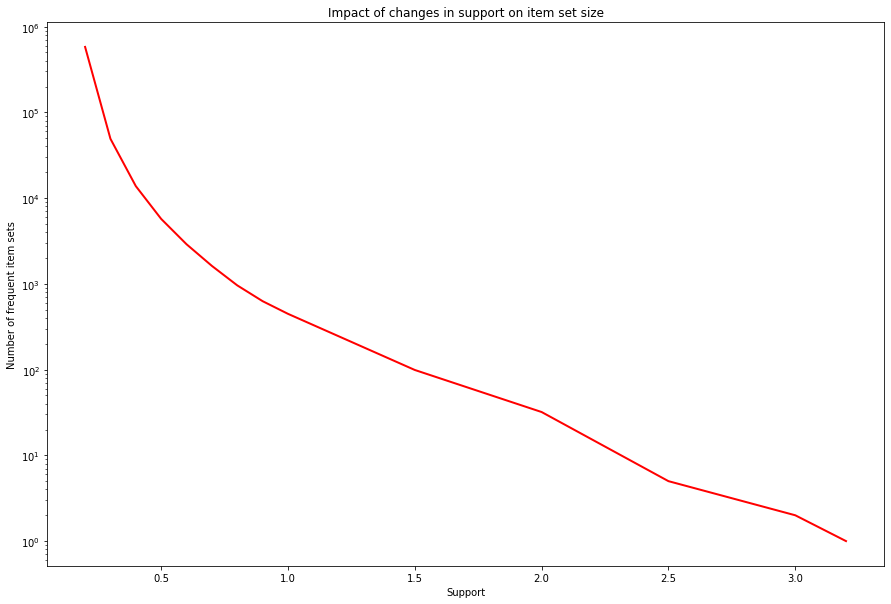

In [23]:
plt.plot(supps, fr_it_set_size, color='red', lw=2)

plt.xlabel('Support')
plt.ylabel('Number of frequent item sets')
plt.title('Impact of changes in support on item set size')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [24]:
print(supps)
print(fr_it_set_size)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 3.2]
[580076, 49163, 13796, 5720, 2896, 1619, 960, 628, 447, 99, 32, 5, 2, 1]


### 3. Максимальная длина частого набора объектов

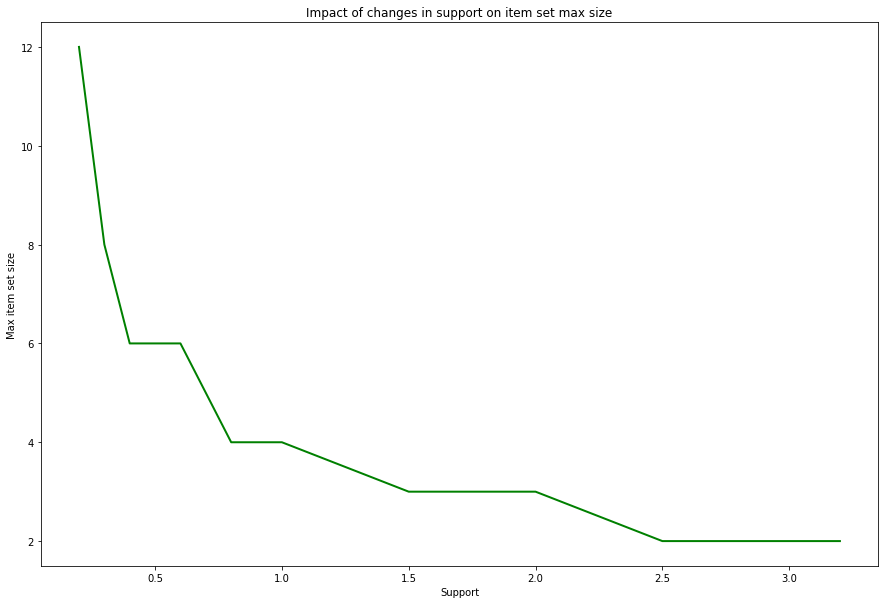

In [25]:
plt.plot(supps, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('Support')
plt.ylabel('Max item set size')
plt.title('Impact of changes in support on item set max size')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Количество частых наборов объектов различной длины

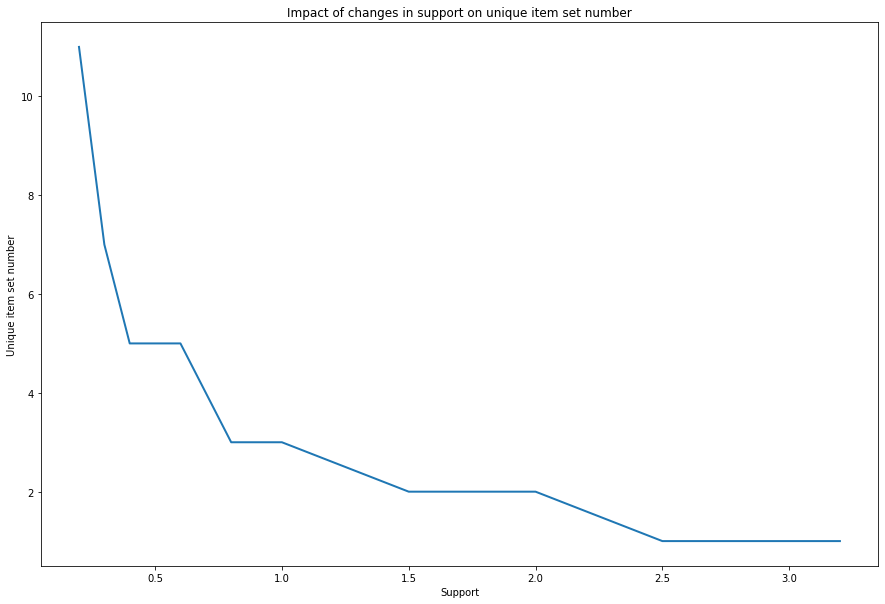

In [26]:
plt.plot(supps, num_of_unique_fr_it_set, lw=2)

plt.xlabel('Support')
plt.ylabel('Unique item set number')
plt.title('Impact of changes in support on unique item set number')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()